In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 5000)

In [3]:
#returns the player using player and match id
def get_player(playerid, matchId):
    path='data/events/'+str(matchId)+'.json'
    with open(path, 'r', encoding='utf-8') as f:
        rd = f.read()
    rd=rd[28:-2]
    obj = json.loads(rd)
    dfw = pd.json_normalize(obj)
    dfw=dfw[dfw['player.id']==playerid]
    return dfw['player.name'].iloc[0], dfw['team.name'].iloc[0]  ,dfw['matchId'].iloc[0]

In [4]:
def bestplayers(df,name):
    for i in range (8):
        id=df['playerId'].iloc[i]
        matchid=df['matchId'].iloc[i]
        player, team, match=get_player(id,matchid)
        x = "{:.2f}".format(df[name].iloc[i])
        print('&',player, '&', team,'&', match, '&', x, '\\\\')
        #  

In [102]:
test=pd.read_csv('ranking/finalv2/ranking_st_scaled.csv')

In [110]:
name='scaled_target'

In [111]:
test=test.sort_values(by=name, ascending=False)

In [ ]:
test

In [114]:
bestplayers(test, name)

& A. Dzyuba & Russia & 2800011 & 213.86 \\
& R. Lukaku & Belgium & 5414312 & 174.17 \\
& H. Kane & England & 2799552 & 164.16 \\
& Cristiano Ronaldo & Portugal & 2799654 & 160.04 \\
& Z. Amdouni & Switzerland & 5414266 & 153.61 \\
& H. Kane & England & 2799587 & 150.07 \\
& M. Dabbur & Israel & 2799965 & 143.83 \\
& T. Pukki & Finland & 2800067 & 141.47 \\


Striker: Harry Kane 8717, Z. Amdouni 614755
Winger: R.Vargas 511155 , E. Hazard 25707
Midfield: KDB 38021, G.Xhaka 49876
Defender: Van dijk 370, akanji 297957
Fullback. J. Cancelo 135903 , R. rodriguez 14922

In [5]:
eventpath='data/events/'
rankpath='ranking/finalv2/'
name='dribbler'

In [41]:
playerdf=pd.read_csv(rankpath+'ranking_st_scaled.csv')

In [42]:
playerdf=playerdf[playerdf['playerId']==614755]
playerdf=playerdf.sort_values(by='matchId', ascending=True)

In [ ]:
playerdf

In [43]:
playerdf.to_csv('final_amdouni_rating.csv', index=False)

In [ ]:
pd.read_csv(rankpath+'ranking_fb_def.csv')

In [129]:
m=pd.read_csv('ranking/finalv2/ranking_st_scaled.csv')

In [130]:
mean1=m['scaled_false 9'].median()
mean2=m['scaled_box'].median()
mean3=m['scaled_2nd runner'].median()
mean4=m['scaled_target'].median()
print(mean1)
print(mean2)
print(mean3)
print(mean4)

45.39109071225893
37.78920794245907
35.31285226725771
46.088355080899454


In [147]:
result=pd.read_csv('gamesfromplayers/final_kane_rating.csv')

In [ ]:
result

In [148]:
result=result[result['seasonId']==21316]

In [145]:
min_val = min(min(data_points1), min(data_points2), min(data_points3), min(data_points4))
#

In [140]:
max_val = max(max(data_points1), max(data_points2), max(data_points3), max(data_points4))
#

97.34081800268976
91.21543835421704
97.61143125581353
102.74178019077303


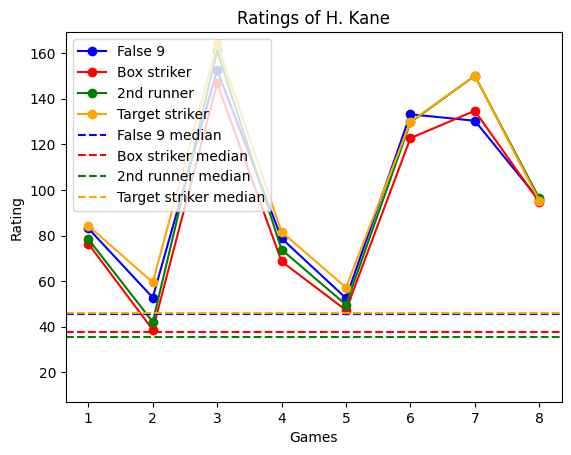

In [149]:
# Example data for three vectors (data_points1, data_points2, data_points3)
data_points1 = np.array(result['scaled_false 9'])
data_points2 = np.array(result['scaled_box'])
data_points3 = np.array(result['scaled_2nd runner'])
data_points4 = np.array(result['scaled_target'])
print(data_points1.mean())
print(data_points2.mean())
print(data_points3.mean())
print(data_points4.mean())

# Generate x-axis values (game numbers)
games = range(1, len(data_points1) + 1)

# Plot the data points for each vector with different colors and connect them
plt.plot(games, data_points1, marker='o', linestyle='-', color='blue', label='False 9')
plt.plot(games, data_points2, marker='o', linestyle='-', color='red', label='Box striker')
plt.plot(games, data_points3, marker='o', linestyle='-', color='green', label='2nd runner')
plt.plot(games, data_points4, marker='o', linestyle='-', color='orange', label='Target striker')

plt.ylim(min_val - 5, max_val + 5)



# Plot horizontal lines at the mean value for each vector
plt.axhline(mean1, color='blue', linestyle='--', label='False 9 median')
plt.axhline(mean2, color='red', linestyle='--', label='Box striker median')
plt.axhline(mean3, color='green', linestyle='--', label='2nd runner median')
plt.axhline(mean4, color='orange', linestyle='--', label='Target striker median')

# Add labels and title
plt.xlabel('Games')
plt.ylabel('Rating')
plt.title('Ratings of H. Kane')
# Add legend
plt.legend()

plt.savefig('kanerating.png')
# Display the plot
plt.show()

Mean of the players:

Kane: 2020
97.34081800268976
91.21543835421704
97.61143125581353
102.74178019077303

Amdouni: 2024
75.347568390527
73.92526397991699
78.1567103539439
82.29751354202332

Vargas: 2024
63.548815445427934
61.67530964712833
62.71731072199411

Hazard: 2020
100.98769637311419
105.6908681480319
99.83843192604121

Cancelo: 2024
81.99502079633629
78.05983888365992
73.21949271778263

R. Rodriguez: 2024
59.313803555850164
59.19696525758228
57.00343415726151

Akanji: 2024
62.46047343903909
65.32449305540102
62.03500276566442

van Dijk: 2024
65.83591516747092
65.04448703935815
67.66942120704144

KDB: 2020
100.03887423620988
81.22339862308469
88.14725158573619
84.29957025436019

Xhaka: 2024
71.33708263285979
80.06782782501605
81.0838199590465
79.45150212051638

Fullback:


Striker:
45.39109071225893
37.78920794245907
35.31285226725771
46.088355080899454

Winger:
31.562222560092252
34.07207700905238
31.19075417435473

CB:
50.07056540209073
51.283789227858776
50.59904178197779

Midfield: 


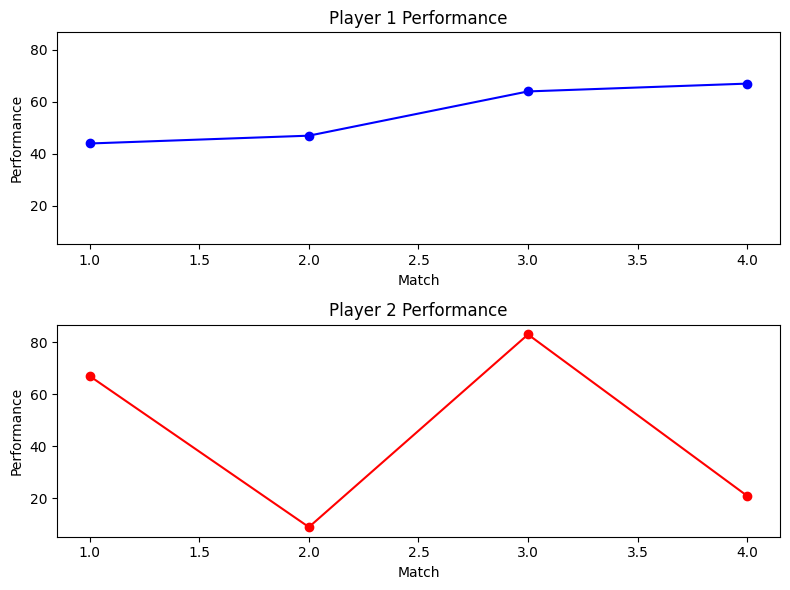

In [53]:
np.random.seed(0)  # for reproducibility
num_matches = 4
num_players = 2

# Random performance vectors for each player
player1_data = np.random.randint(0, 100, size=(num_matches, ))
player2_data = np.random.randint(0, 100, size=(num_matches, ))

# Plotting
fig, axs = plt.subplots(num_players, 1, sharey=True, figsize=(8, 6))

# Plot for Player 1
axs[0].plot(range(1, num_matches + 1), player1_data, marker='o', color='b')
axs[0].set_title('Player 1 Performance')
axs[0].set_xlabel('Match')
axs[0].set_ylabel('Performance')

# Plot for Player 2
axs[1].plot(range(1, num_matches + 1), player2_data, marker='o', color='r')
axs[1].set_title('Player 2 Performance')
axs[1].set_xlabel('Match')
axs[1].set_ylabel('Performance')

plt.tight_layout()
plt.show()